In [1]:
import numpy as np
import pandas as pd

from catboost import Pool, CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv("pharmacy_new.csv")
df =df.drop(columns=['tx_date', 'drug_name', 'brand', 'diagnosis_letter', 'diagnosis_number','Unnamed: 0'])
df = df[df['rejected'] == False]
df = df.drop(columns='rejected')

In [3]:
train,test= train_test_split(df,test_size=0.2, shuffle=True, random_state=42)
train_temp=train
test_temp=test

In [4]:
df['insurance_null'] = df['pcn'].isna().astype(int)+df['group'].isna().astype(int)

In [5]:
df['pcn'].fillna(value = 'None', inplace = True)
df['group'].fillna(value = 'None', inplace = True)

In [6]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [7]:
train_data = train.drop(columns=['patient_pay'])
train_label = train['patient_pay']

In [9]:
len(train_data.columns)

8

In [10]:
train_pool = Pool(train_data, train_label, cat_features = list(range(8)))

In [11]:
model = CatBoostRegressor(iterations =30, 
                         depth = 8,
                         learning_rate=1,
                         loss_function = 'RMSE')
model.fit(train_pool)

0:	learn: 28.9919248	total: 7.07s	remaining: 3m 24s
1:	learn: 22.5340895	total: 14.4s	remaining: 3m 21s
2:	learn: 18.9373054	total: 19.4s	remaining: 2m 54s
3:	learn: 18.2168806	total: 25.2s	remaining: 2m 44s
4:	learn: 17.4315705	total: 29.8s	remaining: 2m 29s
5:	learn: 17.2347553	total: 34.4s	remaining: 2m 17s
6:	learn: 16.1536187	total: 39.5s	remaining: 2m 9s
7:	learn: 16.0369736	total: 44.9s	remaining: 2m 3s
8:	learn: 15.9184995	total: 49.9s	remaining: 1m 56s
9:	learn: 15.8155104	total: 54.7s	remaining: 1m 49s
10:	learn: 15.6781812	total: 59.6s	remaining: 1m 42s
11:	learn: 15.6438940	total: 1m 4s	remaining: 1m 36s
12:	learn: 15.5487066	total: 1m 9s	remaining: 1m 30s
13:	learn: 15.5198615	total: 1m 14s	remaining: 1m 24s
14:	learn: 15.4820691	total: 1m 19s	remaining: 1m 19s
15:	learn: 15.4083734	total: 1m 24s	remaining: 1m 13s
16:	learn: 15.3916949	total: 1m 29s	remaining: 1m 8s
17:	learn: 15.3485652	total: 1m 34s	remaining: 1m 2s
18:	learn: 15.3272320	total: 1m 39s	remaining: 57.6s
19

In [12]:
test_data = test.drop(columns=['patient_pay'])
test_label = test['patient_pay']
preds=model.predict(test_data)
diff = preds - test_label
diff.describe()

count    2.302402e+06
mean     4.365735e-02
std      1.490351e+01
min     -5.138770e+02
25%     -1.400678e+00
50%      9.350114e-02
75%      1.673389e+00
max      2.664082e+02
Name: patient_pay, dtype: float64

In [14]:
test_data[diff>6]

,pharmacy,diagnosis,drug,bin,pcn,group,month,insurance_null
2232638,52,G99.93,branded gorol,664344,TPJD,None,3,1
991147,19,B45.03,branded pranic,571569,KB38N,6BYJBW,2,0
2608649,5,G51.87,branded choxestamenium,322463,None,HO8HUGL,3,1
2696603,55,G51.87,branded choxestamenium,664344,None,52H8KH0F83K,3,1
927929,26,G95.10,branded fumiluric,664344,None,TFZOR5R49,1,1
...,...,...,...,...,...,...,...,...
10037828,3,H54.35,branded thiostasteglume,725700,327CKV,IOEAN1DWVV3Y,10,0
69712,16,P77.13,branded nusudaric,691847,XH4T3,GOM8K0,1,0
2898050,17,E49.13,branded nusudaric,664344,None,YY6B1J4E8KJ3,4,1
9566702,20,G99.93,generic rulfalol,664344,DY4B,None,10,1


In [15]:
test_data['drug'].value_counts(normalize = True, ascending = False)[0:30]

generic prazinib           0.050312
branded prazinib           0.049409
generic rulfalol           0.029139
branded rulfalol           0.028690
branded mule               0.028413
branded hidizuzunib        0.024246
branded tocilic            0.023946
generic pucomalol          0.023898
branded antimab            0.022604
generic tanoclolol         0.022260
branded semufolic          0.021275
generic foxivelule         0.020661
branded pucomalol          0.020408
generic glycontazepelol    0.020241
branded tanoclolol         0.019269
branded foxivelule         0.019188
generic dienulol           0.017936
branded glycontazepelol    0.017858
branded dienulol           0.017262
branded plazamiglutic      0.015739
generic ratin              0.014765
generic tovane             0.013809
generic cupitelol          0.012984
generic oxasoted           0.012732
branded tovane             0.012602
branded ratin              0.012215
branded oxasoted           0.011969
generic momudobatin        0

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
test_label[diff>6]

2232638       6.56
991147      175.51
2608649      16.47
2696603      18.89
927929       16.36
             ...  
10037828     21.25
69712        80.09
2898050     106.43
9566702       6.28
6297008     156.54
Name: patient_pay, Length: 172205, dtype: float64

[]

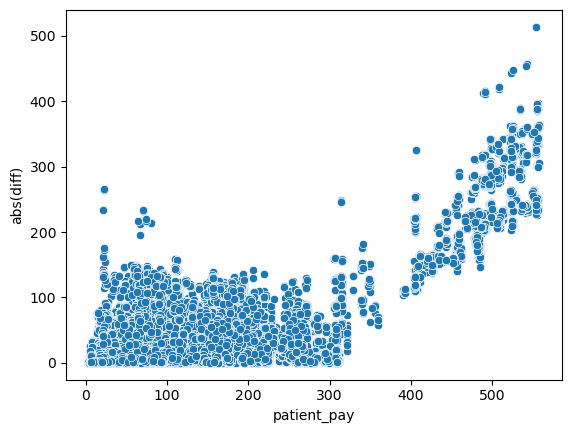

In [34]:
dplot1 =sns.scatterplot(x=test_label, y=abs(diff))
dplot1.set(xlabel='patient_pay', ylabel='abs(diff)')
plt.plot()

[]

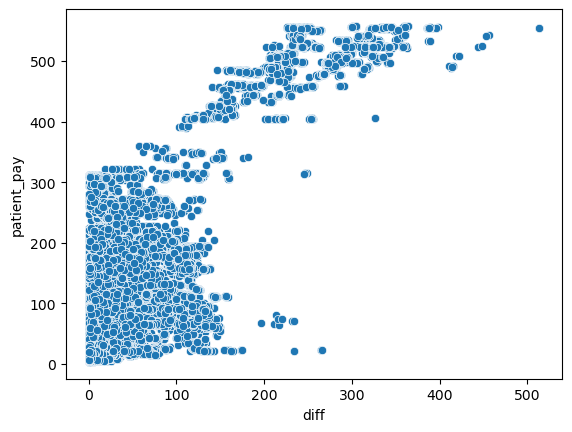

In [29]:
dplot =sns.scatterplot(x=abs(diff), y=test_label)
dplot.set(xlabel='diff', ylabel='patient_pay')
plt.plot()

[]

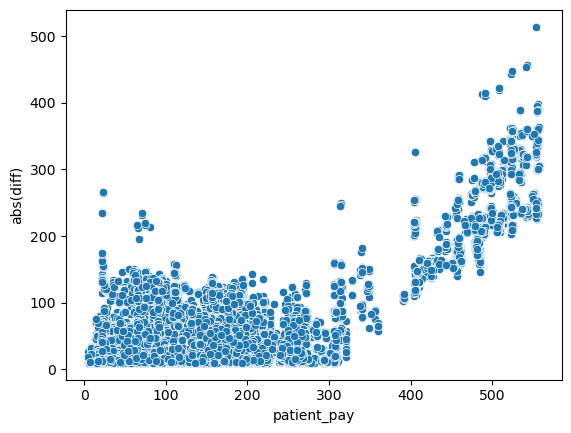

In [35]:
dplot2 =sns.scatterplot(x=test_label[abs(diff)>10], y=abs(diff[abs(diff)>10]))
dplot2.set(xlabel='patient_pay', ylabel='abs(diff)')
plt.plot()

In [37]:
test['patient_pay'].describe()

count    2.302402e+06
mean     2.671797e+01
std      4.163955e+01
min      3.400000e+00
25%      1.044000e+01
50%      1.399000e+01
75%      1.982000e+01
max      5.578600e+02
Name: patient_pay, dtype: float64

In [38]:
df['patient_pay'].describe()

count    1.151201e+07
mean     2.676802e+01
std      4.177772e+01
min      3.400000e+00
25%      1.044000e+01
50%      1.399000e+01
75%      1.982000e+01
max      5.579300e+02
Name: patient_pay, dtype: float64

In [39]:
df[df['drug']=='branded choxestamenium']['patient_pay'].describe()

count    74076.000000
mean       124.184396
std         49.907523
min         15.020000
25%        131.150000
50%        145.930000
75%        153.000000
max        188.020000
Name: patient_pay, dtype: float64

In [42]:
df[df['diagnosis']=='G51.87'].groupby('drug')['patient_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
drug,,,,,,,,
branded choxestamenium,46683.0,124.326741,49.733190,15.02,130.81,145.87,153.16,188.02
branded hidizuzunib,52720.0,70.017362,29.248408,15.02,54.99,83.22,93.66,109.07
branded prazinib,122798.0,12.894443,3.883057,5.22,11.09,12.22,16.42,19.82
generic prazinib,126835.0,10.671764,1.213424,5.64,10.44,10.63,10.72,15.47


In [43]:
df[df['diagnosis']=='G51.87'].groupby('bin')['patient_pay'].describe()

,count,mean,std,min,25%,50%,75%,max
bin,,,,,,,,
96934,21095.0,37.552772,45.609914,10.44,10.44,13.93,80.42,181.80
160389,7104.0,35.073121,42.450873,10.39,10.39,12.54,78.67,133.54
322463,61524.0,25.726782,36.264908,10.12,10.72,11.09,16.47,188.02
539437,13418.0,36.903771,42.687372,7.27,7.27,15.47,93.86,138.76
571569,20012.0,40.670862,55.148216,5.79,5.79,10.84,95.53,188.02
664344,100609.0,34.703299,44.394055,6.21,10.63,11.74,30.31,188.02
691847,34945.0,36.673151,47.072900,5.22,10.72,15.55,17.91,179.69
718350,6267.0,40.085373,49.184376,10.59,10.59,12.74,95.36,146.68
725700,48989.0,42.487914,51.415909,8.22,10.62,11.40,92.37,179.01


In [44]:
df[df['diagnosis']=='G51.87'].groupby(['drug','bin'])['patient_pay'].describe()

count        mean           std     min  \
drug                   bin                                                 
branded choxestamenium 96934    2882.0  126.675344  4.206798e+01   19.74   
                       160389    836.0  132.071770  7.841977e-01  130.74   
                       322463   8060.0   76.908485  6.573386e+01   16.29   
                       539437   1773.0  117.860840  4.282744e+00  115.59   
                       571569   2604.0  159.910760  5.698282e+00  149.15   
                       664344  13392.0  126.337776  4.559159e+01   18.89   
                       691847   4541.0  134.210639  5.052282e+01   15.02   
                       718350    786.0  145.254491  7.500900e-01  143.89   
                       725700   6768.0  144.700004  2.783971e+01   15.43   
                       756120    647.0  147.302117  9.300265e+00  143.54   
                       757349   3458.0  129.522779  3.460360e+01   64.58   
                       956971    936.0  155.061667  5.679321e+00  152.53   
branded hidizuzunib    96934    3241.0   76.360373  1.916434e+01   19.74   
                       160389    976.0   80.056219  7.826793e-01   78.67   
                       322463   9715.0   47.535715  3.406225e+01   16.29   
                       539437   1811.0   95.677278  3.370130e+00   93.42   
                       571569   2939.0   92.739251  1.669708e+01   27.81   
                       664344  15258.0   59.553988  2.790735e+01   18.89   
                       691847   5490.0   66.163674  2.284458e+01   15.02   
                       718350    865.0   96.236428  7.223368e-01   94.95   
                       725700   7739.0   91.446830  1.460910e+01   15.43   
                       756120    598.0   92.915686  4.982618e+00   89.79   
                       757349   3106.0   78.899627  1.115848e+01   60.35   
                       956971    982.0   96.297475  3.529951e+00   94.06   
branded prazinib       96934    7254.0   13.612244  8.327762e-01   11.43   
                       160389   2618.0   12.540000  6.467174e-13   12.54   
                       322463  21364.0   12.460866  2.452038e+00   10.66   
                       539437   4780.0    7.270000  1.749895e-13    7.27   
                       571569   7166.0    6.394655  2.461032e+00    5.79   
                       664344  35180.0   14.281501  4.007396e+00    6.54   
                       691847  12251.0   14.462420  4.060750e+00    5.22   
                       718350   2287.0   12.740000  5.934329e-13   12.74   
                       725700  17009.0   12.436637  2.047475e+00    8.46   
                       756120   1702.0   16.420000  6.858753e-13   16.42   
                       757349   8460.0   16.159082  2.949441e+00    8.28   
                       956971   2727.0    7.379597  1.371231e+00    5.69   
generic prazinib       96934    7718.0   10.478129  9.603908e-02   10.44   
                       160389   2674.0   10.390000  3.695513e-13   10.39   
                       322463  22385.0   10.494024  2.839060e-01   10.12   
                       539437   5054.0   15.470000  8.580652e-13   15.47   
                       571569   7303.0   10.832934  2.824991e-02   10.72   
                       664344  36779.0   10.561755  7.154525e-01    6.21   
                       691847  12663.0   10.398410  1.066775e+00    6.86   
                       718350   2329.0   10.590000  1.297019e-13   10.59   
                       725700  17473.0   10.465804  3.173071e-01    8.22   
                       756120   1675.0   10.720000  1.599199e-13   10.72   
                       757349   8311.0   10.655816  4.070858e-02   10.63   
                       956971   2471.0    7.493974  1.422313e+00    5.64   

                                  25%     50%     75%     max  
drug                   bin                                     
branded choxestamenium 96934   140.43  141.09  141.86  181.80  
                       160389  131.55  1

In [47]:
df[df['diagnosis']=='G51.87'].groupby(['drug','pcn'])['patient_pay'].describe()[41:100]

count        mean           std     min  \
drug                   pcn                                                  
branded choxestamenium W1LW9Y     372.0  118.111210  3.534490e+00  116.02   
                       W7L3        86.0  152.202791  7.988294e+00  149.15   
                       WM6A       936.0  155.061667  5.679321e+00  152.53   
                       XH4T3      364.0  162.153791  9.026425e-01  160.64   
                       YFVIA      991.0  148.614157  7.717156e-01  147.25   
                       YICC41     421.0  156.766508  6.653184e+00  154.26   
                       YL5CMT      85.0  159.504941  4.498267e+00  157.81   
                       ZQPX       326.0  162.014755  7.553007e-01  160.71   
branded hidizuzunib    1UQC      2297.0   92.869125  2.145625e+00   91.14   
                       2TIC       356.0   15.020000  8.894285e-14   15.02   
                       327CKV    4002.0   95.390325  3.368036e+00   92.88   
                       393U       108.0   89.002870  9.079144e-01   87.64   
                       3O71UTS   2628.0   88.632367  7.479026e-01   87.34   
                       3Y5ZW0     491.0   89.263585  6.854289e-01   87.83   
                       6ZGS97C    473.0   17.110000  1.422590e-13   17.11   
                       7THOQ5     598.0   92.915686  4.982618e+00   89.79   
                       9C5MOR3    486.0   98.277263  2.508854e+00   96.36   
                       9D24       320.0   19.740000  1.423311e-13   19.74   
                       9FU70      368.0   51.898967  7.678403e-01   50.51   
                       AZUO5U     310.0   55.468516  8.483369e-01   54.15   
                       BIZF       347.0   92.363458  3.140947e+00   90.40   
                       BZ22Z2     207.0   94.056329  4.555080e+00   91.30   
                       CG3ZWQ     107.0   95.843458  3.629171e+00   93.83   
                       CS8580    1202.0   85.201905  4.450628e+00   82.57   
                       DY4B       993.0   31.653787  7.619260e-01   30.31   
                       FX2Z       104.0   96.878077  2.506898e+00   95.37   
                       IF448      589.0   58.096061  2.348663e+00   56.14   
                       J5DT8      865.0   96.236428  7.223368e-01   94.95   
                       K5KDJ7G     78.0   58.159359  2.474218e+00   55.91   
                       KB38N     2145.0   97.039907  2.991206e+00   94.97   
                       KBOSN      420.0   87.264333  5.661657e+00   84.52   
                       MQWH09H    151.0   68.694636  8.104886e-01   67.38   
                       MSCXSG    2250.0   85.256058  4.970928e+00   82.41   
                       N098KI    1837.0   68.738449  7.633072e-01   67.38   
                       NC7EN     1461.0   88.800185  3.968191e+00   86.65   
                       NG4CS      103.0   69.088835  6.462612e-01   68.26   
                       None     13251.0   58.670666  3.613320e+01   16.47   
                       OO0E       251.0   15.430000  6.585652e-14   15.43   
                       P4LC       230.0   31.785304  8.393679e-01   30.38   
                       RAM3J      132.0   95.458409  2.556581e+00   93.49   
                       RB7UU      976.0   80.056219  7.826793e-01   78.67   
                       REGLCC     644.0   55.497003  7.825729e-01   54.15   
                       RM0HB      556.0   61.610827  7.294463e-01   60.35   
                       S76J7V6   2921.0   82.563221  4.207691e+00   80.13   
                       T17LNK     761.0   66.327937  2.304024e+00   64.48   
                       T52GV     1542.0   16.290000  5.792802e-13   16.29   
                       TAZ5W      785.0   31.717732  8.122345e-01   30.38   
                       TPJD       877.0   57.956078  2.290460e+00   55.85   
                       ULM7G      117.0   88.639744  7.543066e-01   87.65   
                       W1LW9Y     602.0   36.766478  5.961407e+00   33.75   
                       W7L3   

In [41]:
df['patient_pay'].describe()

count    1.151201e+07
mean     2.676802e+01
std      4.177772e+01
min      3.400000e+00
25%      1.044000e+01
50%      1.399000e+01
75%      1.982000e+01
max      5.579300e+02
Name: patient_pay, dtype: float64